# 實驗 五個關鍵字  各找出五篇相關性最高的文章 再從每篇文章找出五個最相關和最不相關的字

In [5]:
import numpy as np
import json
from gensim.models.word2vec import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import re
import jieba
import mysql.connector

In [2]:
#topk1=[[0.86195525, 630096],[0.80302663, 788495],[0.80248214, 332325],[0.78713388, 316568],[0.78443601, 556574]]
topk1=[]
topk2=[]
topk3=[]
topk4=[]
topk5=[]

In [3]:
key_word_list=['國昌','稅','上進','女孩','肥宅']

In [6]:
model = Word2Vec.load('ptt.model')

In [7]:
#TFIDF模型
with open('tfidf.json','r') as f:
    tfidf_vec = json.load(f)
#TFIDF詞庫
with open('dictionary.json','r',encoding='utf-8') as f:
    dictionary = json.load(f)

In [8]:
dictionary=[(int(k),v) for k,v in dictionary.items()]
dictionary = dict(dictionary)
words=[k for k,v in model.wv.vocab.items()]

In [352]:
dictionary.items()

AttributeError: 'list' object has no attribute 'items'

In [9]:
#文章向量
doc_vecs = np.load('doc_vecs.npy')
doc_vecs[0]

array([ 0.68432677, -0.65742016, -1.61808918, -0.08101853,  2.6895285 ,
       -1.16557337,  1.65011459,  0.9803087 , -1.58752767,  1.68244716,
        1.10972539, -1.68030264, -1.1395105 ,  3.25107639,  1.32269648,
        0.82743386, -0.41623321,  0.53607615, -1.57065256,  0.69012886,
        2.54686616, -0.26673729, -1.4694704 ,  3.34437397,  0.90059159,
        0.08684685, -0.41782699, -0.81046889, -0.27375236, -0.77111607,
       -0.06180291, -0.37906045,  1.1377671 , -0.01021118, -0.0931497 ,
       -0.46051132,  2.49795792,  0.95823078,  0.8531136 , -1.76287481,
       -0.96807241, -0.52571353,  0.70573239,  2.07722247, -3.35762441,
        1.27387866,  1.20440416,  3.23651764,  0.77534806,  0.15570434,
       -0.45427418,  1.51203547,  0.01904996, -1.53009278,  0.78664859,
        1.39108481,  3.7369441 , -0.18812104,  0.91076833,  1.8975462 ,
        0.81265628,  0.00646005, -0.00865914,  0.99705971,  0.222465  ,
       -1.36316765,  1.35814426, -0.45444745, -0.28344619, -0.90

## 找出每個關鍵字的前五個和後五個文章

In [10]:
keyword=model['國昌']
flag=10000
topk1=[]
for i in range(len(doc_vecs)):
    temp=[]
    temp.append(cosine_similarity([keyword],[doc_vecs[i]]))
    temp.append(i+1)
    topk1.append(temp)
    if i == flag:
        print("{} 比對完成".format(i+1))
        flag+=10000
topk1.sort(reverse=True)
for i in range(10):
    print(topk1[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


10001 比對完成
20001 比對完成
30001 比對完成
40001 比對完成
50001 比對完成
60001 比對完成
70001 比對完成
80001 比對完成
90001 比對完成
100001 比對完成
110001 比對完成
120001 比對完成
130001 比對完成
140001 比對完成
150001 比對完成
160001 比對完成
170001 比對完成
180001 比對完成
190001 比對完成
200001 比對完成
210001 比對完成
220001 比對完成
230001 比對完成
240001 比對完成
250001 比對完成
260001 比對完成
270001 比對完成
280001 比對完成
290001 比對完成
300001 比對完成
310001 比對完成
320001 比對完成
330001 比對完成
340001 比對完成
350001 比對完成
360001 比對完成
370001 比對完成
380001 比對完成
390001 比對完成
400001 比對完成
410001 比對完成
420001 比對完成
430001 比對完成
440001 比對完成
450001 比對完成
460001 比對完成
470001 比對完成
480001 比對完成
490001 比對完成
500001 比對完成
510001 比對完成
520001 比對完成
530001 比對完成
540001 比對完成
550001 比對完成
560001 比對完成
570001 比對完成
580001 比對完成
590001 比對完成
600001 比對完成
610001 比對完成
620001 比對完成
630001 比對完成
640001 比對完成
650001 比對完成
660001 比對完成
670001 比對完成
680001 比對完成
690001 比對完成
700001 比對完成
710001 比對完成
720001 比對完成
730001 比對完成
740001 比對完成
750001 比對完成
760001 比對完成
770001 比對完成
780001 比對完成
790001 比對完成
800001 比對完成
810001 比對完成
820001 比對完成
830001 比對完成
840001 比對完成
8

In [286]:
print(topk1[0])

[array([[0.86195525]]), 630096]


In [11]:
keyword=model['稅']
flag=10000
topk2=[]
for i in range(len(doc_vecs)):
    temp=[]
    temp.append(cosine_similarity([keyword],[doc_vecs[i]]))
    temp.append(i+1)
    topk2.append(temp)
    if i == flag:
        print("{} 比對完成".format(i+1))
        flag+=10000
topk2.sort(reverse=True)
for i in range(10):
    print(topk2[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


10001 比對完成
20001 比對完成
30001 比對完成
40001 比對完成
50001 比對完成
60001 比對完成
70001 比對完成
80001 比對完成
90001 比對完成
100001 比對完成
110001 比對完成
120001 比對完成
130001 比對完成
140001 比對完成
150001 比對完成
160001 比對完成
170001 比對完成
180001 比對完成
190001 比對完成
200001 比對完成
210001 比對完成
220001 比對完成
230001 比對完成
240001 比對完成
250001 比對完成
260001 比對完成
270001 比對完成
280001 比對完成
290001 比對完成
300001 比對完成
310001 比對完成
320001 比對完成
330001 比對完成
340001 比對完成
350001 比對完成
360001 比對完成
370001 比對完成
380001 比對完成
390001 比對完成
400001 比對完成
410001 比對完成
420001 比對完成
430001 比對完成
440001 比對完成
450001 比對完成
460001 比對完成
470001 比對完成
480001 比對完成
490001 比對完成
500001 比對完成
510001 比對完成
520001 比對完成
530001 比對完成
540001 比對完成
550001 比對完成
560001 比對完成
570001 比對完成
580001 比對完成
590001 比對完成
600001 比對完成
610001 比對完成
620001 比對完成
630001 比對完成
640001 比對完成
650001 比對完成
660001 比對完成
670001 比對完成
680001 比對完成
690001 比對完成
700001 比對完成
710001 比對完成
720001 比對完成
730001 比對完成
740001 比對完成
750001 比對完成
760001 比對完成
770001 比對完成
780001 比對完成
790001 比對完成
800001 比對完成
810001 比對完成
820001 比對完成
830001 比對完成
840001 比對完成
8

In [45]:
keyword=model['香港']
flag=10000
topk3=[]
for i in range(len(doc_vecs)):
    temp=[]
    temp.append(cosine_similarity([keyword],[doc_vecs[i]]))
    temp.append(i+1)
    topk3.append(temp)
    if i == flag:
        print("{} 比對完成".format(i+1))
        flag+=10000
topk3.sort(reverse=True)
for i in range(5):
    print(topk3[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


10001 比對完成
20001 比對完成
30001 比對完成
40001 比對完成
50001 比對完成
60001 比對完成
70001 比對完成
80001 比對完成
90001 比對完成
100001 比對完成
110001 比對完成
120001 比對完成
130001 比對完成
140001 比對完成
150001 比對完成
160001 比對完成
170001 比對完成
180001 比對完成
190001 比對完成
200001 比對完成
210001 比對完成
220001 比對完成
230001 比對完成
240001 比對完成
250001 比對完成
260001 比對完成
270001 比對完成
280001 比對完成
290001 比對完成
300001 比對完成
310001 比對完成
320001 比對完成
330001 比對完成
340001 比對完成
350001 比對完成
360001 比對完成
370001 比對完成
380001 比對完成
390001 比對完成
400001 比對完成
410001 比對完成
420001 比對完成
430001 比對完成
440001 比對完成
450001 比對完成
460001 比對完成
470001 比對完成
480001 比對完成
490001 比對完成
500001 比對完成
510001 比對完成
520001 比對完成
530001 比對完成
540001 比對完成
550001 比對完成
560001 比對完成
570001 比對完成
580001 比對完成
590001 比對完成
600001 比對完成
610001 比對完成
620001 比對完成
630001 比對完成
640001 比對完成
650001 比對完成
660001 比對完成
670001 比對完成
680001 比對完成
690001 比對完成
700001 比對完成
710001 比對完成
720001 比對完成
730001 比對完成
740001 比對完成
750001 比對完成
760001 比對完成
770001 比對完成
780001 比對完成
790001 比對完成
800001 比對完成
810001 比對完成
820001 比對完成
830001 比對完成
840001 比對完成
8

In [13]:
keyword=model['女孩']
flag=10000
topk4=[]
for i in range(len(doc_vecs)):
    temp=[]
    temp.append(cosine_similarity([keyword],[doc_vecs[i]]))
    temp.append(i+1)
    topk4.append(temp)
    if i == flag:
        print("{} 比對完成".format(i+1))
        flag+=10000
topk4.sort(reverse=True)
for i in range(5):
    print(topk4[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


10001 比對完成
20001 比對完成
30001 比對完成
40001 比對完成
50001 比對完成
60001 比對完成
70001 比對完成
80001 比對完成
90001 比對完成
100001 比對完成
110001 比對完成
120001 比對完成
130001 比對完成
140001 比對完成
150001 比對完成
160001 比對完成
170001 比對完成
180001 比對完成
190001 比對完成
200001 比對完成
210001 比對完成
220001 比對完成
230001 比對完成
240001 比對完成
250001 比對完成
260001 比對完成
270001 比對完成
280001 比對完成
290001 比對完成
300001 比對完成
310001 比對完成
320001 比對完成
330001 比對完成
340001 比對完成
350001 比對完成
360001 比對完成
370001 比對完成
380001 比對完成
390001 比對完成
400001 比對完成
410001 比對完成
420001 比對完成
430001 比對完成
440001 比對完成
450001 比對完成
460001 比對完成
470001 比對完成
480001 比對完成
490001 比對完成
500001 比對完成
510001 比對完成
520001 比對完成
530001 比對完成
540001 比對完成
550001 比對完成
560001 比對完成
570001 比對完成
580001 比對完成
590001 比對完成
600001 比對完成
610001 比對完成
620001 比對完成
630001 比對完成
640001 比對完成
650001 比對完成
660001 比對完成
670001 比對完成
680001 比對完成
690001 比對完成
700001 比對完成
710001 比對完成
720001 比對完成
730001 比對完成
740001 比對完成
750001 比對完成
760001 比對完成
770001 比對完成
780001 比對完成
790001 比對完成
800001 比對完成
810001 比對完成
820001 比對完成
830001 比對完成
840001 比對完成
8

In [14]:
keyword=model['肥宅']
flag=10000
topk5=[]
for i in range(len(doc_vecs)):
    temp=[]
    temp.append(cosine_similarity([keyword],[doc_vecs[i]]))
    temp.append(i+1)
    topk5.append(temp)
    if i == flag:
        print("{} 比對完成".format(i+1))
        flag+=10000
    
topk5.sort(reverse=True)
for i in range(5):
    print(topk5[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


10001 比對完成
20001 比對完成
30001 比對完成
40001 比對完成
50001 比對完成
60001 比對完成
70001 比對完成
80001 比對完成
90001 比對完成
100001 比對完成
110001 比對完成
120001 比對完成
130001 比對完成
140001 比對完成
150001 比對完成
160001 比對完成
170001 比對完成
180001 比對完成
190001 比對完成
200001 比對完成
210001 比對完成
220001 比對完成
230001 比對完成
240001 比對完成
250001 比對完成
260001 比對完成
270001 比對完成
280001 比對完成
290001 比對完成
300001 比對完成
310001 比對完成
320001 比對完成
330001 比對完成
340001 比對完成
350001 比對完成
360001 比對完成
370001 比對完成
380001 比對完成
390001 比對完成
400001 比對完成
410001 比對完成
420001 比對完成
430001 比對完成
440001 比對完成
450001 比對完成
460001 比對完成
470001 比對完成
480001 比對完成
490001 比對完成
500001 比對完成
510001 比對完成
520001 比對完成
530001 比對完成
540001 比對完成
550001 比對完成
560001 比對完成
570001 比對完成
580001 比對完成
590001 比對完成
600001 比對完成
610001 比對完成
620001 比對完成
630001 比對完成
640001 比對完成
650001 比對完成
660001 比對完成
670001 比對完成
680001 比對完成
690001 比對完成
700001 比對完成
710001 比對完成
720001 比對完成
730001 比對完成
740001 比對完成
750001 比對完成
760001 比對完成
770001 比對完成
780001 比對完成
790001 比對完成
800001 比對完成
810001 比對完成
820001 比對完成
830001 比對完成
840001 比對完成
8

# 撈DB

In [170]:
maxdb = mysql.connector.connect(
  host = "140.128.102.106",
  user = "moris",
  password = "moris123",
  database = "ptt_data",
  )
cursor=maxdb.cursor()

In [161]:
topk1[0]

[array([[0.86195525]]), 630096]

In [130]:
count_result=[]


def top5(x,X):   #x=排序過的doc_vec & ID list,X=KW
    seg_top5_list=[]
    seg_top5_list2=[]
    result1=[]
    result2=[]
    for i in range(5):
        cursor.execute("select content from ptt_data.ptt_content limit {} , 1".format(x[i][1]-1))
        result1.append(cursor.fetchall())
        
        print("fetch done {}".format(i+1))
        
        cursor.execute("select content from ptt_data.ptt_content limit {} , 1".format(x[-(i+1)][1]-1))
        result2.append(cursor.fetchall())
        
        print("fetch done {}".format(i+1))
    stopword=[]
    result_new=[]
    result_new2=[]
    remainderWords=[]
    remainderWords2=[]
    pattern = r"[0-9]"
    seg_list = []
    seg_list2 = []

    with open('stop_word.txt', 'r', encoding='UTF-8') as file:
        for data in file.readlines():
            data = data.strip()
            stopword.append(data)

    for i in range(len(result1)):
        result_new.append(re.sub(pattern,'',str(result1[i])))
        seg = jieba.cut(result_new[i],cut_all=True)
        remainderWords = list(filter(lambda a: a not in stopword and a != '\n', seg))
        n=" ".join(remainderWords).split()
        seg_list.append(n)
        print('{} jieba1 done'.format(i+1))
    
    for i in range(len(result2)):
        result_new2.append(re.sub(pattern,'',str(result2[i])))
        seg = jieba.cut(result_new2[i],cut_all=True)
        remainderWords2 = list(filter(lambda a: a not in stopword and a != '\n', seg))
        n=" ".join(remainderWords2).split()
        seg_list2.append(n)
        print('{} jieba2 done'.format(i+1))


    seg_top5_list.append(seg_list)
    seg_top5_list2.append(seg_list2)
    
    keyword=model[X]
    for j in range(5):
        kw=0
        pos=0
        neg=0
        kw2=0
        pos2=0
        neg2=0
        for i in range(len(seg_top5_list[0][j])):
            if seg_top5_list[0][j][i] == X:
                kw+=1
            if seg_top5_list[0][j][i] in words:
                if cosine_similarity([keyword],[model[seg_top5_list[0][j][i]]]) > 0:
                    pos+=1
                else:
                    neg+=1
        for i in range(len(seg_top5_list2[0][j])):
            if seg_top5_list2[0][j][i] == X:
                kw2+=1
            if seg_top5_list2[0][j][i] in words:
                if cosine_similarity([keyword],[model[seg_top5_list2[0][j][i]]]) > 0:
                    pos2+=1
                else:
                    neg2+=1
        temp = []
        temp.append(kw/(kw+pos+neg))
        temp.append(pos/(kw+pos+neg))
        temp.append(neg/(kw+pos+neg))
        temp.append(kw2/(kw2+pos2+neg2))
        temp.append(pos2/(kw2+pos2+neg2))
        temp.append(neg2/(kw2+pos2+neg2))
        count_result.append(temp)
        
    print("模型完成")

In [131]:
top5(topk1,'國昌')
top5(topk2,'稅')
top5(topk3,'香港')
top5(topk4,'女孩')
top5(topk5,'肥宅')

fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

模型完成
fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

模型完成
fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

模型完成
fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

模型完成
fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

模型完成


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [132]:
print(count_result)
print(count_result[0])
print(count_result[0][0:3])
print(count_result[0][3:6])

[[0.16666666666666666, 0.6944444444444444, 0.1388888888888889, 0.0, 0.034482758620689655, 0.9655172413793104], [0.125, 0.6666666666666666, 0.20833333333333334, 0.0, 0.045454545454545456, 0.9545454545454546], [0.125, 0.6136363636363636, 0.26136363636363635, 0.0, 0.38461538461538464, 0.6153846153846154], [0.1388888888888889, 0.6666666666666666, 0.19444444444444445, 0.0, 0.08333333333333333, 0.9166666666666666], [0.13513513513513514, 0.7837837837837838, 0.08108108108108109, 0.0, 0.1276595744680851, 0.8723404255319149], [0.02821316614420063, 0.829153605015674, 0.1426332288401254, 0.0, 0.0, 1.0], [0.02772963604852686, 0.8405545927209706, 0.1317157712305026, 0.0, 0.09523809523809523, 0.9047619047619048], [0.011764705882352941, 0.9176470588235294, 0.07058823529411765, 0.0, 0.1891891891891892, 0.8108108108108109], [0.017857142857142856, 0.8392857142857143, 0.14285714285714285, 0.0, 0.14285714285714285, 0.8571428571428571], [0.09302325581395349, 0.6511627906976745, 0.2558139534883721, 0.0, 0.19

In [87]:
import pandas as pd

In [322]:
for i in range(5):
    kw_count.append(count_result[i][0:3])

In [133]:
df2 = pd.DataFrame(np.array([count_result[0][0:3], count_result[1][0:3], count_result[2][0:3],count_result[3][0:3],count_result[4][0:3]]),
                   columns=['kw', 'pos', 'neg'])
df3 = pd.DataFrame(np.array([count_result[0][3:6], count_result[1][3:6], count_result[2][3:6],count_result[3][3:6],count_result[4][3:6]]),
                   columns=['kw', 'pos', 'neg'])

In [139]:
df_temp1 = pd.DataFrame(np.array([topk1[0][0][0][0],topk1[1][0][0][0],topk1[2][0][0][0],topk1[3][0][0][0],topk1[4][0][0][0]]),
            columns=['rel'])
df_temp2 = pd.DataFrame(np.array([topk1[-1][0][0][0],topk1[-2][0][0][0],topk1[-3][0][0][0],topk1[-4][0][0][0],topk1[-5][0][0][0]]),
            columns=['rel'])
df_temp3 = pd.DataFrame(np.array([topk2[0][0][0][0],topk2[1][0][0][0],topk2[2][0][0][0],topk2[3][0][0][0],topk2[4][0][0][0]]),
            columns=['rel'])
df_temp4 = pd.DataFrame(np.array([topk2[-1][0][0][0],topk2[-2][0][0][0],topk2[-3][0][0][0],topk2[-4][0][0][0],topk2[-5][0][0][0]]),
            columns=['rel'])
df_temp5 = pd.DataFrame(np.array([topk3[0][0][0][0],topk3[1][0][0][0],topk3[2][0][0][0],topk3[3][0][0][0],topk3[4][0][0][0]]),
            columns=['rel'])
df_temp6 = pd.DataFrame(np.array([topk3[-1][0][0][0],topk3[-2][0][0][0],topk3[-3][0][0][0],topk3[-4][0][0][0],topk3[-5][0][0][0]]),
            columns=['rel'])
df_temp7 = pd.DataFrame(np.array([topk4[0][0][0][0],topk4[1][0][0][0],topk4[2][0][0][0],topk4[3][0][0][0],topk4[4][0][0][0]]),
            columns=['rel'])
df_temp8 = pd.DataFrame(np.array([topk4[-1][0][0][0],topk4[-2][0][0][0],topk4[-3][0][0][0],topk4[-4][0][0][0],topk4[-5][0][0][0]]),
            columns=['rel'])
df_temp9 = pd.DataFrame(np.array([topk5[0][0][0][0],topk5[1][0][0][0],topk5[2][0][0][0],topk5[3][0][0][0],topk5[4][0][0][0]]),
            columns=['rel'])
df_temp10 = pd.DataFrame(np.array([topk5[-1][0][0][0],topk5[-2][0][0][0],topk5[-3][0][0][0],topk5[-4][0][0][0],topk5[-5][0][0][0]]),
            columns=['rel'])

In [134]:
for i in range(5):
    print(topk2[i][0][0][0])

0.7819690578506285
0.7795185979395723
0.7746941088203536
0.7625465003434387
0.7578125230954794


In [137]:
len(count_result)

25

In [138]:
df_temp1['rel']

0    0.861955
1    0.803027
2    0.802482
3    0.787134
4    0.784436
Name: rel, dtype: float64

In [85]:
df_temp2

,rel
0,-0.310367
1,-0.290074
2,-0.287217
3,-0.283532
4,-0.280794


## 結果在這

## ----國昌

In [140]:
df2['rel']=df_temp1
df2 #最相關前五

,kw,pos,neg,rel
0,0.166667,0.694444,0.138889,0.861955
1,0.125000,0.666667,0.208333,0.803027
2,0.125000,0.613636,0.261364,0.802482
3,0.138889,0.666667,0.194444,0.787134
4,0.135135,0.783784,0.081081,0.784436


In [141]:
df3['rel']=df_temp2
df3 #最不相關前五

,kw,pos,neg,rel
0,0.0,0.034483,0.965517,-0.310367
1,0.0,0.045455,0.954545,-0.290074
2,0.0,0.384615,0.615385,-0.287217
3,0.0,0.083333,0.916667,-0.283532
4,0.0,0.127660,0.872340,-0.280794


In [142]:
df4 = pd.DataFrame(np.array([count_result[5][0:3], count_result[6][0:3], count_result[7][0:3],count_result[8][0:3],count_result[9][0:3]]),
                   columns=['kw', 'pos', 'neg'])
df5 = pd.DataFrame(np.array([count_result[5][3:6], count_result[6][3:6], count_result[7][3:6],count_result[8][3:6],count_result[9][3:6]]),
                   columns=['kw', 'pos', 'neg'])
df6 = pd.DataFrame(np.array([count_result[10][0:3], count_result[11][0:3], count_result[12][0:3],count_result[13][0:3],count_result[14][0:3]]),
                   columns=['kw', 'pos', 'neg'])
df7 = pd.DataFrame(np.array([count_result[10][3:6], count_result[11][3:6], count_result[12][3:6],count_result[13][3:6],count_result[14][3:6]]),
                   columns=['kw', 'pos', 'neg'])
df8 = pd.DataFrame(np.array([count_result[15][0:3], count_result[16][0:3], count_result[17][0:3],count_result[18][0:3],count_result[19][0:3]]),
                   columns=['kw', 'pos', 'neg'])
df9 = pd.DataFrame(np.array([count_result[15][3:6], count_result[16][3:6], count_result[17][3:6],count_result[18][3:6],count_result[19][3:6]]),
                   columns=['kw', 'pos', 'neg'])
df10 = pd.DataFrame(np.array([count_result[20][0:3], count_result[21][0:3], count_result[22][0:3],count_result[23][0:3],count_result[24][0:3]]),
                   columns=['kw', 'pos', 'neg'])
df11 = pd.DataFrame(np.array([count_result[20][3:6], count_result[21][3:6], count_result[22][3:6],count_result[23][3:6],count_result[24][3:6]]),
                   columns=['kw', 'pos', 'neg'])


## ----稅

In [144]:
df4['rel']=df_temp3
df4 #最相關前五

,kw,pos,neg,rel
0,0.028213,0.829154,0.142633,0.781969
1,0.027730,0.840555,0.131716,0.779519
2,0.011765,0.917647,0.070588,0.774694
3,0.017857,0.839286,0.142857,0.762547
4,0.093023,0.651163,0.255814,0.757813


In [145]:
df5['rel']=df_temp4
df5 #最不相關前五

,kw,pos,neg,rel
0,0.0,0.000000,1.000000,-0.317454
1,0.0,0.095238,0.904762,-0.309025
2,0.0,0.189189,0.810811,-0.304261
3,0.0,0.142857,0.857143,-0.298467
4,0.0,0.192308,0.807692,-0.298208


##  ----香港

In [146]:
df6['rel']=df_temp5
df6 #最相關前五

,kw,pos,neg,rel
0,0.285714,0.666667,0.047619,0.940728
1,0.134615,0.788462,0.076923,0.847586
2,0.118644,0.644068,0.237288,0.845835
3,0.106061,0.772727,0.121212,0.840567
4,0.106383,0.680851,0.212766,0.837505


In [147]:
df7['rel']=df_temp6
df7 #最不相關前五

,kw,pos,neg,rel
0,0.0,0.129032,0.870968,-0.262299
1,0.0,0.227273,0.772727,-0.261265
2,0.0,0.111111,0.888889,-0.260679
3,0.0,0.055556,0.944444,-0.254768
4,0.0,0.111111,0.888889,-0.252967


## ----女孩

In [148]:
df8['rel']=df_temp7
df8 #最相關前五

,kw,pos,neg,rel
0,0.123529,0.770588,0.105882,0.875205
1,0.136364,0.818182,0.045455,0.846932
2,0.142857,0.857143,0.000000,0.840126
3,0.136364,0.772727,0.090909,0.839969
4,0.111111,0.638889,0.250000,0.835789


In [149]:
df9['rel']=df_temp8
df9 #最不相關前五

,kw,pos,neg,rel
0,0.0,0.125000,0.875000,-0.315002
1,0.0,0.259615,0.740385,-0.314470
2,0.0,0.191011,0.808989,-0.311800
3,0.0,0.245161,0.754839,-0.311707
4,0.0,0.198276,0.801724,-0.310720


##     -----肥宅

In [150]:
df10['rel']=df_temp9
df10 #最相關前五

,kw,pos,neg,rel
0,0.263158,0.631579,0.105263,0.890893
1,0.265306,0.673469,0.061224,0.872928
2,0.181818,0.727273,0.090909,0.862769
3,0.139535,0.767442,0.093023,0.862631
4,0.217391,0.695652,0.086957,0.854983


In [151]:
df11['rel']=df_temp10
df11 #最相關前五

,kw,pos,neg,rel
0,0.0,0.086022,0.913978,-0.451305
1,0.0,0.133333,0.866667,-0.448205
2,0.0,0.137931,0.862069,-0.439963
3,0.0,0.189369,0.810631,-0.438069
4,0.0,0.183824,0.816176,-0.434651


In [154]:
import matplotlib.pyplot as plt

In [155]:
count_result

[[0.16666666666666666,
  0.6944444444444444,
  0.1388888888888889,
  0.0,
  0.034482758620689655,
  0.9655172413793104],
 [0.125,
  0.6666666666666666,
  0.20833333333333334,
  0.0,
  0.045454545454545456,
  0.9545454545454546],
 [0.125,
  0.6136363636363636,
  0.26136363636363635,
  0.0,
  0.38461538461538464,
  0.6153846153846154],
 [0.1388888888888889,
  0.6666666666666666,
  0.19444444444444445,
  0.0,
  0.08333333333333333,
  0.9166666666666666],
 [0.13513513513513514,
  0.7837837837837838,
  0.08108108108108109,
  0.0,
  0.1276595744680851,
  0.8723404255319149],
 [0.02821316614420063, 0.829153605015674, 0.1426332288401254, 0.0, 0.0, 1.0],
 [0.02772963604852686,
  0.8405545927209706,
  0.1317157712305026,
  0.0,
  0.09523809523809523,
  0.9047619047619048],
 [0.011764705882352941,
  0.9176470588235294,
  0.07058823529411765,
  0.0,
  0.1891891891891892,
  0.8108108108108109],
 [0.017857142857142856,
  0.8392857142857143,
  0.14285714285714285,
  0.0,
  0.14285714285714285,
  0.85

In [180]:
plot_result=[]
def scatter_test(x,X):
    seg_top5_list=[]
    seg_top5_list2=[]
    result1=[]
    result2=[]
    for i in range(5):
        cursor.execute("select content from ptt_data.ptt_content limit {} , 1".format(x[i][1]-1))
        result1.append(cursor.fetchall())
        
        print("fetch done {}".format(i+1))
        
        cursor.execute("select content from ptt_data.ptt_content limit {} , 1".format(x[-(i+1)][1]-1))
        result2.append(cursor.fetchall())
        
        print("fetch done {}".format(i+1))
    stopword=[]
    result_new=[]
    result_new2=[]
    remainderWords=[]
    remainderWords2=[]
    pattern = r"[0-9]"
    seg_list = []
    seg_list2 = []

    with open('stop_word.txt', 'r', encoding='UTF-8') as file:
        for data in file.readlines():
            data = data.strip()
            stopword.append(data)

    for i in range(len(result1)):
        result_new.append(re.sub(pattern,'',str(result1[i])))
        seg = jieba.cut(result_new[i],cut_all=True)
        remainderWords = list(filter(lambda a: a not in stopword and a != '\n', seg))
        n=" ".join(remainderWords).split()
        seg_list.append(n)
        print('{} jieba1 done'.format(i+1))
    
    for i in range(len(result2)):
        result_new2.append(re.sub(pattern,'',str(result2[i])))
        seg = jieba.cut(result_new2[i],cut_all=True)
        remainderWords2 = list(filter(lambda a: a not in stopword and a != '\n', seg))
        n=" ".join(remainderWords2).split()
        seg_list2.append(n)
        print('{} jieba2 done'.format(i+1))


    seg_top5_list.append(seg_list)
    seg_top5_list2.append(seg_list2)
    keyword=model[X]
    for j in range(5):
        pos=[]
        neg=[]
        pos2=[]
        neg2=[]
        for i in range(len(seg_top5_list[0][j])):
            if seg_top5_list[0][j][i] in words:
                pos.append(cosine_similarity([keyword],[model[seg_top5_list[0][j][i]]]))
        for i in range(len(seg_top5_list2[0][j])):
            if seg_top5_list2[0][j][i] in words:
                pos2.append(cosine_similarity([keyword],[model[seg_top5_list2[0][j][i]]]))

        temp = []

        temp.append(pos)

        temp.append(pos2)

        plot_result.append(temp)

In [181]:
scatter_test(topk1,'國昌')
scatter_test(topk2,'稅')
scatter_test(topk3,'香港')
scatter_test(topk4,'女孩')
scatter_test(topk5,'肥宅')

fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [182]:
print(len(plot_result))
print(len(plot_result[0]))
print(len(plot_result[0][0]))
print(plot_result[0][0])

25
2
30
[array([[0.0870112]], dtype=float32), array([[1.0000001]], dtype=float32), array([[0.02624769]], dtype=float32), array([[0.0400648]], dtype=float32), array([[0.00794945]], dtype=float32), array([[0.31769603]], dtype=float32), array([[-0.05663262]], dtype=float32), array([[1.0000001]], dtype=float32), array([[-0.0019433]], dtype=float32), array([[0.14514802]], dtype=float32), array([[0.08955912]], dtype=float32), array([[0.07267919]], dtype=float32), array([[0.31769603]], dtype=float32), array([[0.00897953]], dtype=float32), array([[1.0000001]], dtype=float32), array([[-0.00109708]], dtype=float32), array([[0.31524593]], dtype=float32), array([[0.18293647]], dtype=float32), array([[0.31524593]], dtype=float32), array([[1.0000001]], dtype=float32), array([[0.18199915]], dtype=float32), array([[0.37560758]], dtype=float32), array([[0.01685992]], dtype=float32), array([[1.0000001]], dtype=float32), array([[-0.0031177]], dtype=float32), array([[0.12284918]], dtype=float32), array([[

In [202]:
import matplotlib.pyplot as plt
font = {'family' : 'SimHei',
'weight' : 'bold',
'size'  : '16'}
plt.rc('font', **font)        # 步驟一（設定字型的更多屬性）
plt.rc('axes', unicode_minus=False) # 步驟二（解決座標軸負數的負號顯示問題）

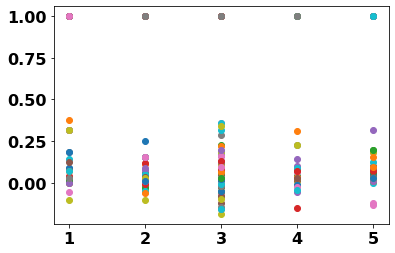

In [207]:
for i in range(len(plot_result[0][0])):
    plt.scatter(1,plot_result[0][0][i])
for i in range(len(plot_result[1][0])):
    plt.scatter(2,plot_result[1][0][i])
for i in range(len(plot_result[2][0])):
    plt.scatter(3,plot_result[2][0][i])
for i in range(len(plot_result[3][0])):
    plt.scatter(4,plot_result[3][0][i])
for i in range(len(plot_result[4][0])):
    plt.scatter(5,plot_result[4][0][i])
#國昌top5


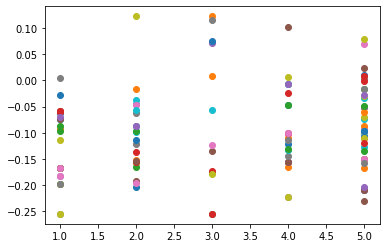

In [195]:
for i in range(len(plot_result[0][1])):
    plt.scatter(1,plot_result[0][1][i])
for i in range(len(plot_result[1][1])):
    plt.scatter(2,plot_result[1][1][i])
for i in range(len(plot_result[2][1])):
    plt.scatter(3,plot_result[2][1][i])
for i in range(len(plot_result[3][1])):
    plt.scatter(4,plot_result[3][1][i])
for i in range(len(plot_result[4][1])):
    plt.scatter(5,plot_result[4][1][i])
#國昌last5

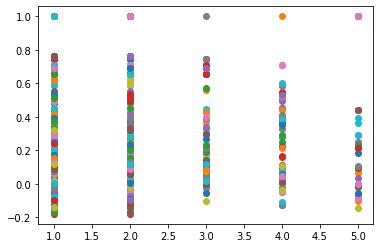

In [196]:
for i in range(len(plot_result[5][0])):
    plt.scatter(1,plot_result[5][0][i])
for i in range(len(plot_result[6][0])):
    plt.scatter(2,plot_result[6][0][i])
for i in range(len(plot_result[7][0])):
    plt.scatter(3,plot_result[7][0][i])
for i in range(len(plot_result[8][0])):
    plt.scatter(4,plot_result[8][0][i])
for i in range(len(plot_result[9][0])):
    plt.scatter(5,plot_result[9][0][i])
#稅top5

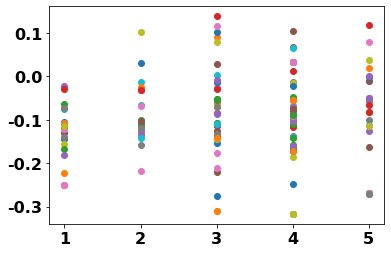

In [208]:
for i in range(len(plot_result[5][1])):
    plt.scatter(1,plot_result[5][1][i])
for i in range(len(plot_result[6][1])):
    plt.scatter(2,plot_result[6][1][i])
for i in range(len(plot_result[7][1])):
    plt.scatter(3,plot_result[7][1][i])
for i in range(len(plot_result[8][1])):
    plt.scatter(4,plot_result[8][1][i])
for i in range(len(plot_result[9][1])):
    plt.scatter(5,plot_result[9][1][i])
#稅


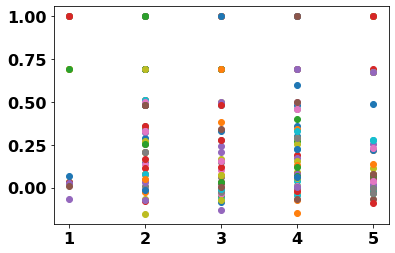

In [209]:
for i in range(len(plot_result[10][0])):
    plt.scatter(1,plot_result[10][0][i])
for i in range(len(plot_result[11][0])):
    plt.scatter(2,plot_result[11][0][i])
for i in range(len(plot_result[12][0])):
    plt.scatter(3,plot_result[12][0][i])
for i in range(len(plot_result[13][0])):
    plt.scatter(4,plot_result[13][0][i])
for i in range(len(plot_result[14][0])):
    plt.scatter(5,plot_result[14][0][i])
#香港top5

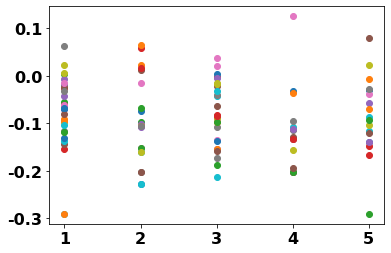

In [210]:
for i in range(len(plot_result[10][1])):
    plt.scatter(1,plot_result[10][1][i])
for i in range(len(plot_result[11][1])):
    plt.scatter(2,plot_result[11][1][i])
for i in range(len(plot_result[12][1])):
    plt.scatter(3,plot_result[12][1][i])
for i in range(len(plot_result[13][1])):
    plt.scatter(4,plot_result[13][1][i])
for i in range(len(plot_result[14][1])):
    plt.scatter(5,plot_result[14][1][i])
#香港last5


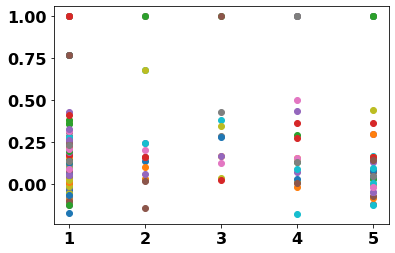

In [211]:
for i in range(len(plot_result[15][0])):
    plt.scatter(1,plot_result[15][0][i])
for i in range(len(plot_result[16][0])):
    plt.scatter(2,plot_result[16][0][i])
for i in range(len(plot_result[17][0])):
    plt.scatter(3,plot_result[17][0][i])
for i in range(len(plot_result[18][0])):
    plt.scatter(4,plot_result[18][0][i])
for i in range(len(plot_result[19][0])):
    plt.scatter(5,plot_result[19][0][i])
#女孩top5

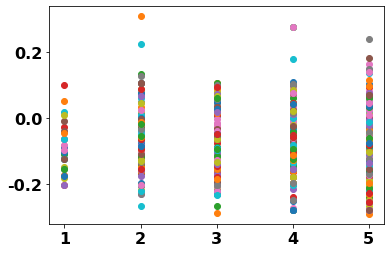

In [212]:
for i in range(len(plot_result[15][1])):
    plt.scatter(1,plot_result[15][1][i])
for i in range(len(plot_result[16][1])):
    plt.scatter(2,plot_result[16][1][i])
for i in range(len(plot_result[17][1])):
    plt.scatter(3,plot_result[17][1][i])
for i in range(len(plot_result[18][1])):
    plt.scatter(4,plot_result[18][1][i])
for i in range(len(plot_result[19][1])):
    plt.scatter(5,plot_result[19][1][i])
#女孩last5

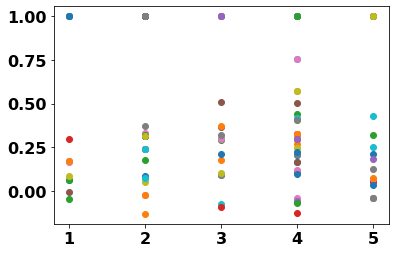

In [213]:
for i in range(len(plot_result[20][0])):
    plt.scatter(1,plot_result[20][0][i])
for i in range(len(plot_result[21][0])):
    plt.scatter(2,plot_result[21][0][i])
for i in range(len(plot_result[22][0])):
    plt.scatter(3,plot_result[22][0][i])
for i in range(len(plot_result[23][0])):
    plt.scatter(4,plot_result[23][0][i])
for i in range(len(plot_result[24][0])):
    plt.scatter(5,plot_result[24][0][i])
#肥宅top5

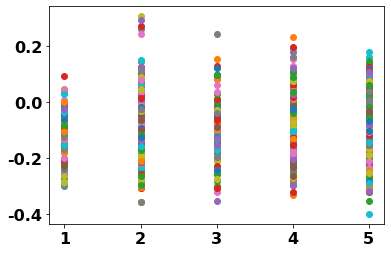

In [214]:
for i in range(len(plot_result[20][1])):
    plt.scatter(1,plot_result[20][1][i])
for i in range(len(plot_result[21][1])):
    plt.scatter(2,plot_result[21][1][i])
for i in range(len(plot_result[22][1])):
    plt.scatter(3,plot_result[22][1][i])
for i in range(len(plot_result[23][1])):
    plt.scatter(4,plot_result[23][1][i])
for i in range(len(plot_result[24][1])):
    plt.scatter(5,plot_result[24][1][i])
#肥宅lasy5

In [ ]:
dic={"KW":count_result[0:5][3:6][0],"POS":,"C":"3"}
id=["0","1","2"]
df=pd.DataFrame(dic,index=id)
print(df)

In [235]:
dictionary=[(int(k),v) for k,v in dictionary.items()]
dictionary = dict(dictionary)
words=[k for k,v in model.wv.vocab.items()]

In [252]:
keyword=model['國昌']
for j in range(5):
    kw=0
    pos=0
    neg=0
    for i in range(len(seg_top5_list[0][j])):
        if seg_top5_list[0][j][i] =='國昌':
            kw+=1
        if seg_top5_list[0][j][i] in words:
            if cosine_similarity([keyword],[model[seg_top5_list[0][j][i]]]) > 0:
                pos+=1
            else:
                neg+=1
    #print(str(kw)+' '+str(pos)+' '+str(neg))
    print("-----------")
    
    

def top5_final(X,Y,Z):
    keyword=model[X]
    for j in range(5):
        kw=0
        pos=0
        neg=0
        kw1=0
        pos
        for i in range(len(Y[0][j])):
            if Y[0][j][i] == X:
                kw+=1
            if Y[0][j][i] in words:
                if cosine_similarity([keyword],[model[Y[0][j][i]]]) > 0:
                    pos+=1
                else:
                    neg+=1
        Z.append(str(kw)+' '+str(pos)+' '+str(neg))
        print("-----------")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-package

6 25 5
-----------
6 32 10
-----------
11 54 23
-----------
5 24 7
-----------
5 29 3
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-pa

In [245]:
keyword=model['國昌']
for j in range(5):
    kw=0
    pos=0
    neg=0
    for i in range(len(seg_top5_list2[0][j])):
        if seg_top5_list2[0][j][i] =='國昌':
            kw+=1
        if seg_top5_list2[0][j][i] in words:
            if cosine_similarity([keyword],[model[seg_top5_list2[0][j][i]]]) > 0:
                pos+=1
            else:
                neg+=1
    print(kw)
    print(pos)
    print(neg)
    print("-----------")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-package

5
29
3
-----------
5
24
7
-----------
11
54
23
-----------
6
32
10
-----------
6
25
5
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-pa

In [262]:

def top5_final(X,Y,Z):
    keyword=model[X]
    for j in range(5):
        kw=0
        pos=0
        neg=0
        for i in range(len(Y[0][j])):
            if Y[0][j][i] == X:
                kw+=1
            if Y[0][j][i] in words:
                if cosine_similarity([keyword],[model[Y[0][j][i]]]) > 0:
                    pos+=1
                else:
                    neg+=1
        Z.append(str(kw)+' '+str(pos)+' '+str(neg))
        print("-----------")

In [263]:
a=[]
b=[]
top5_final('國昌',seg_top5_list,a)
top5_final('國昌',seg_top5_list2,b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: Depreca

['6 25 5']
-----------
['6 25 5', '6 32 10']
-----------
['6 25 5', '6 32 10', '11 54 23']
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

['6 25 5', '6 32 10', '11 54 23', '5 24 7']
-----------
['6 25 5', '6 32 10', '11 54 23', '5 24 7', '5 29 3']
-----------
['5 29 3']
-----------
['5 29 3', '5 24 7']
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

['5 29 3', '5 24 7', '11 54 23']
-----------
['5 29 3', '5 24 7', '11 54 23', '6 32 10']
-----------
['5 29 3', '5 24 7', '11 54 23', '6 32 10', '6 25 5']
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

In [264]:
print(a)
print(b)

['6 25 5', '6 32 10', '11 54 23', '5 24 7', '5 29 3']
['5 29 3', '5 24 7', '11 54 23', '6 32 10', '6 25 5']


In [270]:
top5(topk2)


fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done


In [271]:
a=[]
b=[]
top5_final('稅',seg_top5_list,a)
top5_final('稅',seg_top5_list2,b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: Depreca

['18 529 91']
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

['18 529 91', '16 485 76']
-----------
['18 529 91', '16 485 76', '1 78 6']
-----------
['18 529 91', '16 485 76', '1 78 6', '1 47 8']
-----------
['18 529 91', '16 485 76', '1 78 6', '1 47 8', '4 28 11']
-----------
['0 0 19']
-----------
['0 0 19', '0 2 19']
-----------
['0 0 19', '0 2 19', '0 7 30']
-----------
['0 0 19', '0 2 19', '0 7 30', '0 8 48']
-----------
['0 0 19', '0 2 19', '0 7 30', '0 8 48', '0 5 21']
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

In [272]:
print(a)
print(b)

['18 529 91', '16 485 76', '1 78 6', '1 47 8', '4 28 11']
['0 0 19', '0 2 19', '0 7 30', '0 8 48', '0 5 21']


In [273]:
top5(topk3)
a=[]
b=[]
top5_final('上進',seg_top5_list,a)
top5_final('上進',seg_top5_list2,b)
print(a)
print(b)

fetch done 1
fetch done 1
fetch done 2
fetch done 2
fetch done 3
fetch done 3
fetch done 4
fetch done 4
fetch done 5
fetch done 5
1 jieba1 done
2 jieba1 done
3 jieba1 done
4 jieba1 done
5 jieba1 done
6 jieba1 done
7 jieba1 done
8 jieba1 done
9 jieba1 done
10 jieba1 done
1 jieba2 done
2 jieba2 done
3 jieba2 done
4 jieba2 done
5 jieba2 done
6 jieba2 done
7 jieba2 done
8 jieba2 done
9 jieba2 done
10 jieba2 done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: Depreca

['0 278 342']
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

['0 278 342', '0 258 303']
-----------
['0 278 342', '0 258 303', '0 36 48']
-----------
['0 278 342', '0 258 303', '0 36 48', '0 38 17']
-----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

['0 278 342', '0 258 303', '0 36 48', '0 38 17', '0 17 22']
-----------
['0 8 11']
-----------
['0 8 11', '0 10 11']
-----------
['0 8 11', '0 10 11', '0 12 25']
-----------
['0 8 11', '0 10 11', '0 12 25', '0 19 37']
-----------
['0 8 11', '0 10 11', '0 12 25', '0 19 37', '0 5 21']
-----------
['0 278 342', '0 258 303', '0 36 48', '0 38 17', '0 17 22']
['0 8 11', '0 10 11', '0 12 25', '0 19 37', '0 5 21']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/p

## 五個關鍵字  每個關鍵字相關的五篇相關文章  五篇不相關文章  

In [101]:
print(len(seg_top5_list))
print(len(seg_top5_list[0]))
print(len(seg_top5_list[0][0]))

5
5
42


In [186]:
p_rel=[]
n_rel=[]

In [193]:
dictionary=[(int(k),v) for k,v in dictionary.items()]
dictionary = dict(dictionary)
words=[k for k,v in model.wv.vocab.items()]

def compare_kw_token(Y,Z):
    keyword=model[Y]
    for i in range(len(seg_top5_list[Z-1])):
        temp=[]
        temp2 = []
        temp3 = []
        temp4 = {}

        
        for j in range(len(seg_top5_list[Z-1][i])):
            if seg_top5_list[Z-1][i][j] in words:
                temp4[seg_top5_list[Z-1][i][j]]=cosine_similarity([keyword],[model[seg_top5_list[Z-1][i][j]]])
            print("{} {} 比對完成".format(i+1,j+1))
        #temp.sort(key = lambda s: s[0][0][0])
        [ v for v in sorted(temp4.values())]

        for i in range(6):
            for l in range(len(temp4)):
                if temp4.value[l] < 1:
                    if len(temp2) < 5:
                        temp2.append(temp4)
            temp3.append(temp[-(i+1)])
        p_rel.append(temp2)
        n_rel.append(temp3)

In [194]:
compare_kw_token('國昌',1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.w

1 1 比對完成
1 2 比對完成
1 3 比對完成
1 4 比對完成
1 5 比對完成
1 6 比對完成
1 7 比對完成
1 8 比對完成
1 9 比對完成
1 10 比對完成
1 11 比對完成
1 12 比對完成
1 13 比對完成
1 14 比對完成
1 15 比對完成
1 16 比對完成
1 17 比對完成
1 18 比對完成
1 19 比對完成
1 20 比對完成
1 21 比對完成
1 22 比對完成
1 23 比對完成
1 24 比對完成
1 25 比對完成
1 26 比對完成
1 27 比對完成
1 28 比對完成
1 29 比對完成
1 30 比對完成
1 31 比對完成
1 32 比對完成
1 33 比對完成
1 34 比對完成
1 35 比對完成
1 36 比對完成
1 37 比對完成
1 38 比對完成
1 39 比對完成
1 40 比對完成
1 41 比對完成
1 42 比對完成
2 1 比對完成
2 2 比對完成
2 3 比對完成
2 4 比對完成
2 5 比對完成
2 6 比對完成
2 7 比對完成
2 8 比對完成
2 9 比對完成
2 10 比對完成
2 11 比對完成
2 12 比對完成
2 13 比對完成
2 14 比對完成
2 15 比對完成
2 16 比對完成
2 17 比對完成
2 18 比對完成
2 19 比對完成
2 20 比對完成
2 21 比對完成
2 22 比對完成
2 23 比對完成
2 24 比對完成
2 25 比對完成
2 26 比對完成
2 27 比對完成
2 28 比對完成
2 29 比對完成
2 30 比對完成
2 31 比對完成
2 32 比對完成
2 33 比對完成
2 34 比對完成
2 35 比對完成
2 36 比對完成
2 37 比對完成
2 38 比對完成
2 39 比對完成
2 40 比對完成
2 41 比對完成
2 42 比對完成
2 43 比對完成
2 44 比對完成
2 45 比對完成
2 46 比對完成
2 47 比對完成
2 48 比對完成
2 49 比對完成
2 50 比對完成
2 51 比對完成
2 52 比對完成
3 1 比對完成
3 2 比對完成
3 3 比對完成
3 4 比對完成
3 5 比對完成
3 6 比對完成
3 7 比對完成
3 8 比對完成
3 9 比對

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be re

In [195]:
p_rel

[[[array([[0.0870112]], dtype=float32),
   '說',
   array([[1.0000001]], dtype=float32),
   '國昌',
   array([[0.02624769]], dtype=float32),
   '沒',
   array([[0.0400648]], dtype=float32),
   '不用',
   array([[0.00794945]], dtype=float32),
   '怕',
   array([[0.31769603]], dtype=float32),
   '邱顯智',
   array([[-0.05663262]], dtype=float32),
   '塑膠',
   array([[1.0000001]], dtype=float32),
   '國昌',
   array([[-0.0019433]], dtype=float32),
   '搭',
   array([[0.14514802]], dtype=float32),
   '煙',
   array([[0.08955912]], dtype=float32),
   '案',
   array([[0.07267919]], dtype=float32),
   '資料',
   array([[0.31769603]], dtype=float32),
   '邱顯智',
   array([[0.00897953]], dtype=float32),
   '欸',
   array([[1.0000001]], dtype=float32),
   '國昌',
   array([[-0.00109708]], dtype=float32),
   '重要',
   array([[0.31524593]], dtype=float32),
   '力量',
   array([[0.18293647]], dtype=float32),
   '時代',
   array([[0.31524593]], dtype=float32),
   '力量',
   array([[1.0000001]], dtype=float32),
   '國昌',
   array(